# Домашнее задание "Теория вероятности. Дискретные Случайные Величины".

## Уровень 0:

- Задание 1:

Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов.

Благоприятствующими исходами для события "выпадет простое число орлов меньшее 15" будут исходы, когда орел выпадет 2, 3, 5, 7, 11 или 13 раз. Для каждого из этих вариантов мы можем посчитать вероятность по формуле Бернулли

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bernoulli(p, n, k):
    '''формула Бернулли для произвольнх значений вероятности p, количества опытов n и появления события k'''
    Cnk = math.factorial(n) / (math.factorial(k)*math.factorial(n-k))
    result = Cnk * (p**k) * ((1-p)**(n-k))
    return result

In [5]:
# для честной монеты p=1/2, по условиям задачи n = 15, k одно из [2, 3, 5, 7, 11, 13]

p_total = 0
n = 15
for k in [2, 3, 5, 7, 11, 13]:
    p_k = bernoulli(p=0.5, n=n, k=k)
    print(f'Вероятность выпадения орла {k} раз(а) из {n} составляет {round(p_k, 4)}')
    p_total += p_k
    
print(f'Вероятность выпадения простого числа орлов сосавляет {round(p_total, 4)}')
    

Вероятность выпадения орла 2 раз(а) из 15 составляет 0.0032
Вероятность выпадения орла 3 раз(а) из 15 составляет 0.0139
Вероятность выпадения орла 5 раз(а) из 15 составляет 0.0916
Вероятность выпадения орла 7 раз(а) из 15 составляет 0.1964
Вероятность выпадения орла 11 раз(а) из 15 составляет 0.0417
Вероятность выпадения орла 13 раз(а) из 15 составляет 0.0032
Вероятность выпадения простого числа орлов сосавляет 0.35


- Задание 2:


Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

In [24]:
# Создадим дискретную случайную величину с не менее, чем 10 значениями
random_value = np.random.randint(low=1, high=101, size=10)
random_value

array([74, 47, 59, 22,  6, 40, 72, 49, 30,  8])

In [25]:
# Просемплируем 1000 случайных значений
# параметр р оставим по умолчанию None, пусть элементы random_value могут оказаться в сэмпле с одинаковой вероятностью
sampling = np.random.choice(random_value, 1000)


(array([0.02911765, 0.        , 0.01294118, 0.0175    , 0.        ,
        0.01426471, 0.02779412, 0.01264706, 0.        , 0.03279412]),
 array([ 6. , 12.8, 19.6, 26.4, 33.2, 40. , 46.8, 53.6, 60.4, 67.2, 74. ]),
 <BarContainer object of 10 artists>)

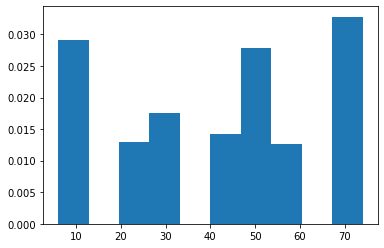

In [28]:
# строим гистограмму
plt.hist(sampling, bins=10, density=True)

In [29]:
# посчитаем метрики
print(f'Среднее: {np.mean(sampling)}')
print(f'Дисперсия: {np.var(sampling)}')
print(f'Медиана: {np.median(sampling)}')

Среднее: 41.211
Дисперсия: 540.912479
Медиана: 40.0


## Уровень 1:

- Задание 3:


Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

Рассмотрим события А1 и А2. Для остальных пар событий рассуждения будут аналогичными.  
По определению А1 и А2 независимы, если вероятность их одновременного наступления будет равна произведению их отдельных вероятностей:  
$P(A1A2) = P(A1)*P(A2)$

Покажем, что так и есть. Для этого проанализируем возможные исходы подбрасывания 3х монет.

In [30]:
import pandas as pd

In [37]:
# Пусть 0 - выпаление монеты орлом, 1 - решкой
df = pd.DataFrame({'M1':[0,0,0,0,1,1,1,1],
                  'M2':[0,0,1,1,0,0,1,1],
                  'M3':[0,1,0,1,0,1,0,1]})
df

,M1,M2,M3
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,1
4,1,0,0
5,1,0,1
6,1,1,0
7,1,1,1


In [38]:
df.loc[df.M1==df.M2, 'A1'] = True # монеты 1 и 2 упали одной стороной -> исход, благоприятный для А1
df.loc[df.M2==df.M3, 'A2'] = True # аналогично для А2
df.loc[df.M1==df.M3, 'A3'] = True # аналогично для А3
df.fillna(False, inplace=True)
df

,M1,M2,M3,A1,A2,A3
0,0,0,0,True,True,True
1,0,0,1,True,False,False
2,0,1,0,False,False,True
3,0,1,1,False,True,False
4,1,0,0,False,True,False
5,1,0,1,False,False,True
6,1,1,0,True,False,False
7,1,1,1,True,True,True


Как видно из полученного датафрейма, вероятность собыитя Р(А1) = 4/8 = 1/2, так же Р(А2) = 1/2.
Пересечение событий А1 и А2 означает, что монеты 1 и 2 упали одной стороной и одновременно монеты 2 и 3 упали одной стороной, т.е. все три монеты упали одной стороной одновременно. Таких исходов у нас 2 (все монеты выпали орлом либо все монеты выпали решкой) из 8, соотвественно Р(А1А2) = 2/8 = 1/4   
Подставим значения вероятностей в нашу формулу $P(A1A2) = P(A1)*P(A2)$. Получим:  
$1/4 = 1/2 * 1/2$  

Это верное равенство. Аналогичное получим для $P(А2А1) = P(A2)*P(A1)$. Следовательно А1 и А2 попарно независимы. Это логично: даже если мы знаем, что монеты 1 и 2 выпали одной стороной, это не влияет на то, какой стороной кпадет монета 3, т.е. вероятность наступления А1 не несет для нас никакой информации, что А2 стало более или менее вероятным

Аналогично доказывается, что попарно независимы А2 и А3, А1 и А3

Чтобы доказать, что совокупность всех 3х событий не является независимой, воспользуемся аналогичной формулой. Рассмотрим одновременное наступление событий А1, А2 и А3 как пересечение (А1А2) для которого мы уже показали попарную независимость с (А3). Если события независимы, то будет выполняться следующее:  

$P((A1A2)A3) = P(A1A2)*P(A3)$

Т.к. мы уже показали, что $P(A1A2) = P(A1)*P(A2)$, будет справедливым следующее:

$P((A1A2)A3) = P(A1)*P(A2)*P(A3)$

Одновременное наступление всех 3х событий означает, что все монеты выпали либо орлом, либо решкой, т.е. вероятность  P((A1A2)A3) = 2/8 = 1/4

Каждая из вероятностей P(Ai) = 4/8 = 1/2

Подставим в формулу, получим, что:

$1/4 = 1/2 * 1/2 * 1/2$

Это неверно. Следовательно все 3 события в совокупности зависимы.   
Одновременное выполнение событий А1 и А2 уже гарантирует, что все монеты выпадут одной стороной, т.е. событие А3 в любом случае будет выполнено.


- Задание 4 (формула полной вероятности):


В магазин привезли устройства с 3-х разных предприятий. 

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. 

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

Интересующее нас событие А такое, что новая продукция окажется высшего сорта.  
Гипотезы В1, В2 и В3 в том, что продукция постцпила с 1го, 2го или 3го предприятия соответственно. Нам известны:  
$P(B1) = 0.2$  
$P(B2) = 0.3$  
$P(B3) = 0.5$  

Так же нам известны условные вероятности P(A|Bi) - продукция окажется высшего сорта при условии, что она поступила с i-го предприятия. Эти вероятности составляют:  
$P(A|B1) = 0.1$  
$P(A|B2) = 0.05$  
$P(A|B3) = 0.2$  

Таким образом, у нас есть все необходимые данные, чтобы посчитать Р(А), используя формулу полной вероятности:   
$P(A) = P(A|B1)P(B1) + P(A|B2)P(B2) + P(A|B3)P(B3)$


In [39]:
p_a = 0.1*0.2 + 0.05*0.3 + 0.2*0.5
p_a

0.135

Вероятность того, что случайно купленная новая продукция окажется высшего сорта составляет **0.135**